# Notebook 3 - Entraînement Unet + VGG16
- notebooks/03_model_training_unet_vgg16.ipynb
# 1- Importation librairies

In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import joblib
from dotenv import load_dotenv
load_dotenv()

project_root = Path("..").resolve()
src_path = project_root / "src"
sys.path.append(str(src_path))

from utils.utils import plot_history

## 1.1 - Chemin racine du projet pour les imports relatifs

In [2]:
# Remonter à la racine du projet
project_root = Path("..").resolve()

# Ajouter src/ au PYTHONPATH
src_path = project_root / "src"
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

# Chemins utiles
data_dir      = project_root / "data"
processed_dir = data_dir / "processed"
models_dir    = project_root / "models"
outputs_dir   = project_root / "outputs"

# Exemple d'usage :
train_path = processed_dir / "train.npz"
val_path   = processed_dir / "val.npz"

In [3]:
from model_training.train_unet_vgg16 import train_unet_vgg16

# 2 - Chargement des données

In [4]:
train = np.load(train_path)
val   = np.load(val_path)

X_train, y_train = train["X"], train["Y"]
X_val, y_val     = val["X"], val["Y"]

## 2.1 - Paramètres de test rapide (dev agile ou prod, suivant contexte)
### 2.1.1 - Taille réduite pour test rapide

In [5]:
params_test = {
    'output_dir': str(models_dir),
    'model_name': "unet_vgg16_test",
    'force_retrain': False,
    'epochs': 10,
    'batch_size': 4,
    'loss_function': "sparse_categorical_crossentropy",
    'test_mode': False
}

### 2.1.2 - Full training pour mise en production

In [6]:
# params_prod = {
#     'output_dir': str(models_dir),
#     'model_name': "unet_vgg16",
#     'force_retrain': False,
#     'epochs': 40,
#     'batch_size': 8,
#     'loss_function': "sparse_categorical_crossentropy"
# }

In [ ]:
# Paramètres à tester (grid)
params_grid = [
    {'output_dir': "models/", 'model_name': "unet_vgg16_a", 'force_retrain': False, 'epochs': 30, 'batch_size': 4, 'loss_function': "sparse_categorical_crossentropy",'use_early_stopping': True},
    {'output_dir': "models/", 'model_name': "unet_vgg16_b", 'force_retrain': False, 'epochs': 40, 'batch_size': 8, 'loss_function': "sparse_categorical_crossentropy",'use_early_stopping': True},
    {'output_dir': "models/", 'model_name': "unet_vgg16_c", 'force_retrain': False, 'epochs': 50, 'batch_size': 8, 'loss_function': "sparse_categorical_crossentropy",'use_early_stopping': True},
    {'output_dir': "models/", 'model_name': "unet_vgg16_d", 'force_retrain': False, 'epochs': 50, 'batch_size': 16, 'loss_function': "sparse_categorical_crossentropy",'use_early_stopping': True},
]

# 3 - Entraînement du modèle avec sélection du meilleur run

In [8]:
# Exécution des runs
results = []

🔁 Entraînement 1/4 : {'output_dir': 'models/', 'model_name': 'unet_vgg16_a', 'force_retrain': True, 'epochs': 30, 'batch_size': 4, 'loss_function': 'sparse_categorical_crossentropy', 'use_early_stopping': True}
🔄 Lancement du serveur MLflow local...
✅ Serveur MLflow démarré sur http://127.0.0.1:5000
[LOG] ➤ train_unet_vgg16 appelé
[INFO] Entraînement d'un modèle UNet + VGG16...



Epoch 1/30


1000/1000 [==============================] - ETA: 0s - loss: 0.5007 - accuracy: 0.8168
Epoch 1: val_loss improved from inf to 0.45396, saving model to models\unet_vgg16_a.h5
1000/1000 [==============================] - 411s 410ms/step - loss: 0.5007 - accuracy: 0.8168 - val_loss: 0.4540 - val_accuracy: 0.8355
Epoch 2/30


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P08\2-python\venv_p8\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1000/1000 [==============================] - ETA: 0s - loss: 0.4466 - accuracy: 0.8280
Epoch 2: val_loss improved from 0.45396 to 0.43970, saving model to models\unet_vgg16_a.h5
1000/1000 [==============================] - 406s 407ms/step - loss: 0.4466 - accuracy: 0.8280 - val_loss: 0.4397 - val_accuracy: 0.8296
Epoch 3/30
1000/1000 [==============================] - ETA: 0s - loss: 0.4334 - accuracy: 0.8321
Epoch 3: val_loss improved from 0.43970 to 0.41904, saving model to models\unet_vgg16_a.h5
1000/1000 [==============================] - 416s 416ms/step - loss: 0.4334 - accuracy: 0.8321 - val_loss: 0.4190 - val_accuracy: 0.8411
Epoch 4/30
1000/1000 [==============================] - ETA: 0s - loss: 0.4254 - accuracy: 0.8349
Epoch 4: val_loss improved from 0.41904 to 0.41744, saving model to models\unet_vgg16_a.h5
1000/1000 [==============================] - 416s 416ms/step - loss: 0.4254 - accuracy: 0.8349 - val_loss: 0.4174 - val_accuracy: 0.8412
Epoch 5/30
1000/1000 [===========

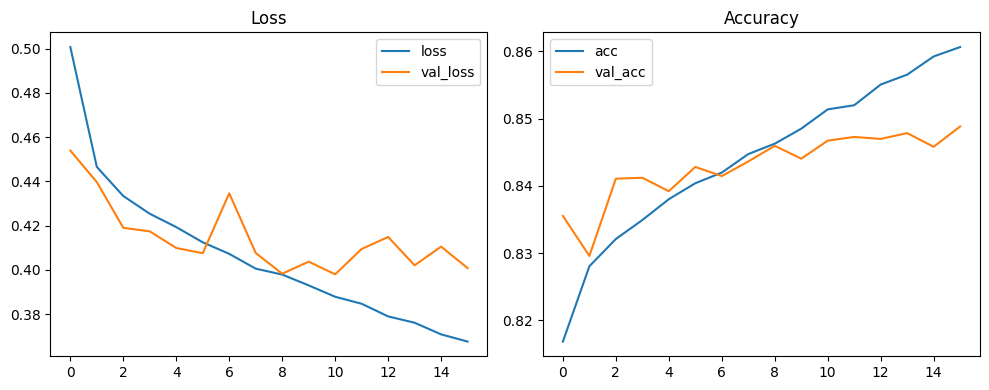

2025/04/13 18:56:48 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\motar\AppData\Local\Temp\tmprudapjpn\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\motar\AppData\Local\Temp\tmprudapjpn\model\data\model\assets
c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P08\2-python\venv_p8\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


🔁 Entraînement 2/4 : {'output_dir': 'models/', 'model_name': 'unet_vgg16_b', 'force_retrain': False, 'epochs': 40, 'batch_size': 8, 'loss_function': 'sparse_categorical_crossentropy', 'use_early_stopping': True}
✅ Serveur MLflow déjà actif sur http://127.0.0.1:5000
[LOG] ➤ train_unet_vgg16 appelé
[INFO] Entraînement d'un modèle UNet + VGG16...
Epoch 1/40
500/500 [==============================] - ETA: 0s - loss: 0.5037 - accuracy: 0.8177
Epoch 1: val_loss improved from inf to 0.44091, saving model to models\unet_vgg16_b.h5
500/500 [==============================] - 381s 761ms/step - loss: 0.5037 - accuracy: 0.8177 - val_loss: 0.4409 - val_accuracy: 0.8344
Epoch 2/40


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P08\2-python\venv_p8\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


500/500 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.8280
Epoch 2: val_loss improved from 0.44091 to 0.42252, saving model to models\unet_vgg16_b.h5
500/500 [==============================] - 387s 773ms/step - loss: 0.4469 - accuracy: 0.8280 - val_loss: 0.4225 - val_accuracy: 0.8359
Epoch 3/40
500/500 [==============================] - ETA: 0s - loss: 0.4342 - accuracy: 0.8321
Epoch 3: val_loss improved from 0.42252 to 0.41749, saving model to models\unet_vgg16_b.h5
500/500 [==============================] - 391s 782ms/step - loss: 0.4342 - accuracy: 0.8321 - val_loss: 0.4175 - val_accuracy: 0.8422
Epoch 4/40
500/500 [==============================] - ETA: 0s - loss: 0.4228 - accuracy: 0.8361
Epoch 4: val_loss improved from 0.41749 to 0.40320, saving model to models\unet_vgg16_b.h5
500/500 [==============================] - 391s 782ms/step - loss: 0.4228 - accuracy: 0.8361 - val_loss: 0.4032 - val_accuracy: 0.8447
Epoch 5/40
500/500 [=========================

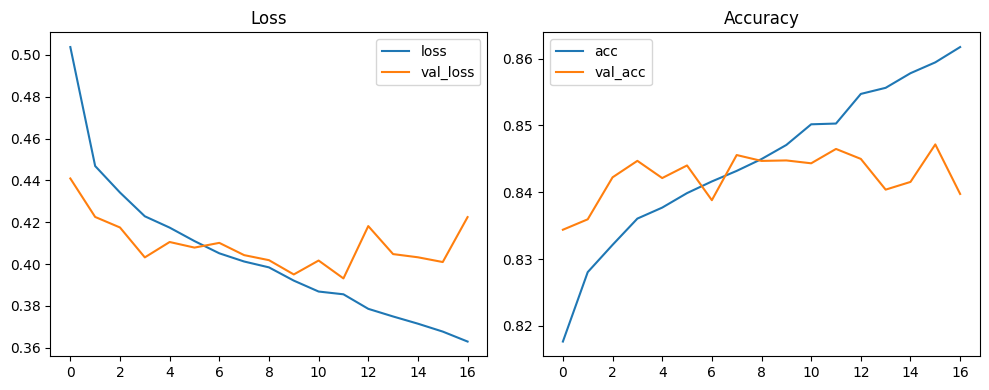

2025/04/13 20:45:53 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\motar\AppData\Local\Temp\tmpvqiv7wag\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\motar\AppData\Local\Temp\tmpvqiv7wag\model\data\model\assets


🔁 Entraînement 3/4 : {'output_dir': 'models/', 'model_name': 'unet_vgg16_c', 'force_retrain': True, 'epochs': 50, 'batch_size': 8, 'loss_function': 'sparse_categorical_crossentropy', 'use_early_stopping': True}
✅ Serveur MLflow déjà actif sur http://127.0.0.1:5000
[LOG] ➤ train_unet_vgg16 appelé
[INFO] Entraînement d'un modèle UNet + VGG16...
Epoch 1/50
500/500 [==============================] - ETA: 0s - loss: 0.5074 - accuracy: 0.8190
Epoch 1: val_loss improved from inf to 0.44829, saving model to models\unet_vgg16_c.h5
500/500 [==============================] - 378s 755ms/step - loss: 0.5074 - accuracy: 0.8190 - val_loss: 0.4483 - val_accuracy: 0.8096
Epoch 2/50


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P08\2-python\venv_p8\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


500/500 [==============================] - ETA: 0s - loss: 0.4514 - accuracy: 0.8279
Epoch 2: val_loss improved from 0.44829 to 0.42949, saving model to models\unet_vgg16_c.h5
500/500 [==============================] - 376s 752ms/step - loss: 0.4514 - accuracy: 0.8279 - val_loss: 0.4295 - val_accuracy: 0.8368
Epoch 3/50
500/500 [==============================] - ETA: 0s - loss: 0.4383 - accuracy: 0.8315
Epoch 3: val_loss improved from 0.42949 to 0.42413, saving model to models\unet_vgg16_c.h5
500/500 [==============================] - 381s 763ms/step - loss: 0.4383 - accuracy: 0.8315 - val_loss: 0.4241 - val_accuracy: 0.8382
Epoch 4/50
500/500 [==============================] - ETA: 0s - loss: 0.4245 - accuracy: 0.8365
Epoch 4: val_loss improved from 0.42413 to 0.41242, saving model to models\unet_vgg16_c.h5
500/500 [==============================] - 383s 766ms/step - loss: 0.4245 - accuracy: 0.8365 - val_loss: 0.4124 - val_accuracy: 0.8439
Epoch 5/50
500/500 [=========================

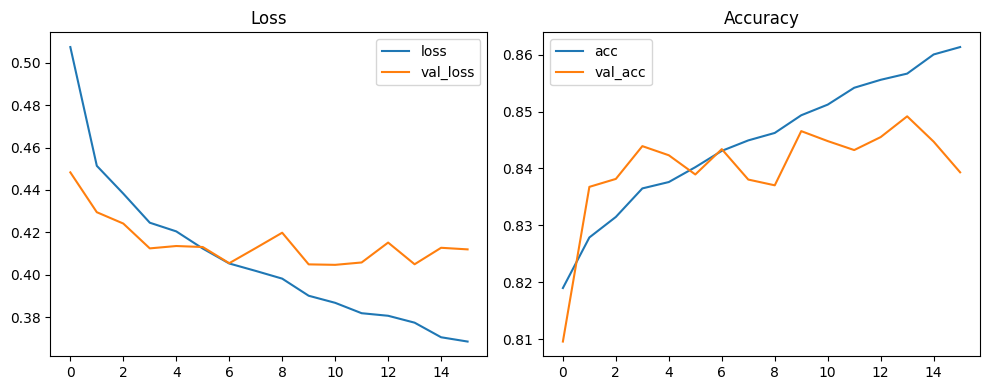

2025/04/13 22:26:53 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\motar\AppData\Local\Temp\tmp84syon9x\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\motar\AppData\Local\Temp\tmp84syon9x\model\data\model\assets


🔁 Entraînement 4/4 : {'output_dir': 'models/', 'model_name': 'unet_vgg16_d', 'force_retrain': True, 'epochs': 50, 'batch_size': 16, 'loss_function': 'sparse_categorical_crossentropy', 'use_early_stopping': True}
✅ Serveur MLflow déjà actif sur http://127.0.0.1:5000
[LOG] ➤ train_unet_vgg16 appelé
[INFO] Entraînement d'un modèle UNet + VGG16...
Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 0.5109 - accuracy: 0.8172
Epoch 1: val_loss improved from inf to 0.47090, saving model to models\unet_vgg16_d.h5
250/250 [==============================] - 362s 1s/step - loss: 0.5109 - accuracy: 0.8172 - val_loss: 0.4709 - val_accuracy: 0.8218
Epoch 2/50


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P08\2-python\venv_p8\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - ETA: 0s - loss: 0.4445 - accuracy: 0.8297
Epoch 2: val_loss improved from 0.47090 to 0.42101, saving model to models\unet_vgg16_d.h5
250/250 [==============================] - 359s 1s/step - loss: 0.4445 - accuracy: 0.8297 - val_loss: 0.4210 - val_accuracy: 0.8380
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 0.4326 - accuracy: 0.8329
Epoch 3: val_loss did not improve from 0.42101
250/250 [==============================] - 365s 1s/step - loss: 0.4326 - accuracy: 0.8329 - val_loss: 0.4351 - val_accuracy: 0.8404
Epoch 4/50
250/250 [==============================] - ETA: 0s - loss: 0.4278 - accuracy: 0.8353
Epoch 4: val_loss improved from 0.42101 to 0.40749, saving model to models\unet_vgg16_d.h5
250/250 [==============================] - 364s 1s/step - loss: 0.4278 - accuracy: 0.8353 - val_loss: 0.4075 - val_accuracy: 0.8436
Epoch 5/50
250/250 [==============================] - ETA: 0s - loss: 0.4162 - accuracy: 0.8371
Ep

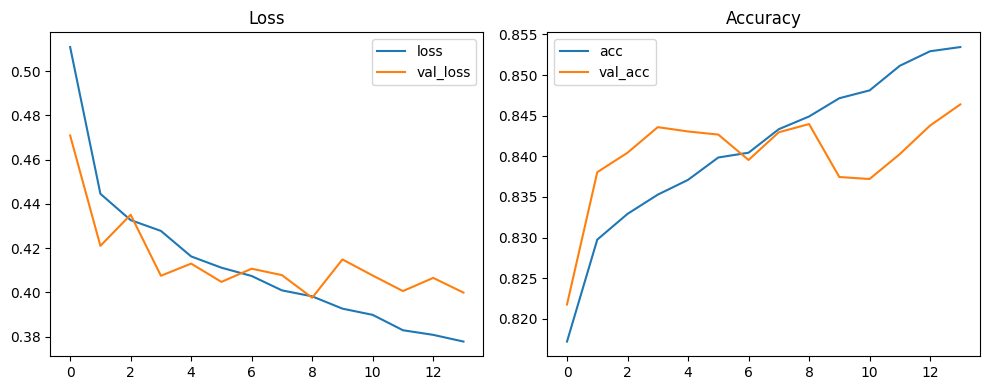

2025/04/13 23:51:36 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\motar\AppData\Local\Temp\tmpslormk4x\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\motar\AppData\Local\Temp\tmpslormk4x\model\data\model\assets


In [9]:
for i, params in enumerate(params_grid):
    print(f"🔁 Entraînement {i+1}/{len(params_grid)} : {params}")
    model, history = train_unet_vgg16(
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        **params
    )
    val_acc = max(history.history['val_accuracy'])
    results.append({
        'run': i+1,
        'params': params,
        'val_accuracy': val_acc,
        'model': model,
        'history': history
    })

## 3.1 - Sélection du meilleur run

In [10]:
best_run = sorted(results, key=lambda x: x['val_accuracy'], reverse=True)[0]
best_model = best_run['model']
best_history = best_run['history']
best_params = best_run['params']

In [11]:
print(f"\n✅ Meilleur modèle : {best_params['model_name']} avec val_accuracy = {best_run['val_accuracy']:.4f}")


✅ Meilleur modèle : unet_vgg16_c avec val_accuracy = 0.8492


In [12]:
best_model_path = Path(models_dir) / "best_unet_vgg16.h5"
best_history_path = Path(models_dir) / "best_unet_vgg16_history.pkl"

In [13]:
best_model.save(best_model_path)
joblib.dump(best_history.history, best_history_path)

c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P08\2-python\venv_p8\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['C:\\Users\\motar\\Desktop\\1-openclassrooms\\AI_Engineer\\1-projets\\P08\\2-python\\models\\best_unet_vgg16_history.pkl']

In [14]:
# # params = params_test
# params = params_prod

# model, history = train_unet_vgg16(
#     X_train=X_train,
#     y_train=y_train,
#     X_val=X_val,
#     y_val=y_val,
#     **params
# )

# 4 - Résumé et courbes du modèle

[INFO] 📊 Résumé du modèle champion et affichage des courbes
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 

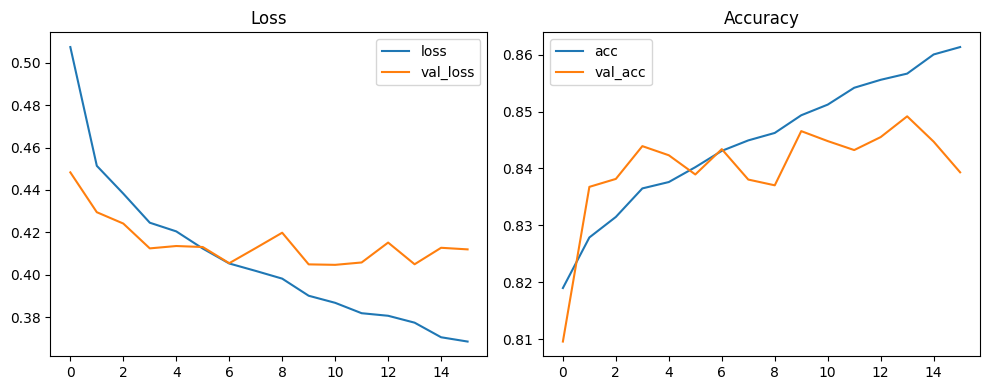

In [15]:
if isinstance(best_history, dict) and best_history.get("test_mode"):
    print("[INFO] ✅ Test rapide terminé. Pas d'entraînement complet.")
else:
    print("[INFO] 📊 Résumé du modèle champion et affichage des courbes")
    best_model.summary()

    plot_path = outputs_dir / f"plot_{best_params['model_name']}_BEST.png"
    plot_history(best_history, plot_path)

In [16]:
# if isinstance(history, dict) and history.get("test_mode"):
#     print("[INFO] ✅ Test rapide terminé. Pas d'entraînement complet.")
# else:
#     print("[INFO] 📊 Affichage du résumé du modèle et des courbes")
#     model.summary()

#     # Construction du chemin d'enregistrement depuis notebooks/
#     plot_path = Path("..") / "outputs" / f"plot_{params['model_name']}.png"
#     plot_history(history, plot_path)

### === Exemple de prédiction (facultatif pour test rapide) ===
#### y_pred = model.predict(X_val[:1])
#### plt.imshow(np.argmax(y_pred[0], axis=-1))
#### plt.title("Exemple de prédiction")
#### plt.show()